In [1]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# модули библиотеки PyTorch
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.nn import functional as F
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv("/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
columns_num = ['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
columns_cat = ['BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']
target = ['Attrition']

In [4]:
data = data.drop(['Over18'], axis = 1)
columns_cat.remove('Over18')

In [5]:
data = pd.get_dummies(data, columns=columns_cat)

In [6]:
columns_cat_new = []
for col_name in columns_cat:
    columns_cat_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
columns_cat = columns_cat_new

In [7]:
data['Attrition'] = data['Attrition'].replace(to_replace ="Yes", value = 1) 
data['Attrition'] = data['Attrition'].replace(to_replace ="No", value = 0) 

In [8]:
data = data.drop(['EmployeeCount'], axis = 1)
columns_num.remove('EmployeeCount')
data = data.drop(['StandardHours'], axis = 1)
columns_num.remove('StandardHours')

In [9]:
columns_num.remove('HourlyRate')
columns_num.remove('PerformanceRating')
columns_cat.remove('JobRole_Research Scientist')

data = data.drop(['HourlyRate'], axis = 1)
data = data.drop(['PerformanceRating'], axis = 1)
data = data.drop(['JobRole_Research Scientist'], axis = 1)

In [10]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[columns_num + columns_cat])
data[columns_num + columns_cat] = pca.transform(data[columns_num + columns_cat])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
loss_train = []
loss_test = []
f1_train = []
f1_test = []

Один слой

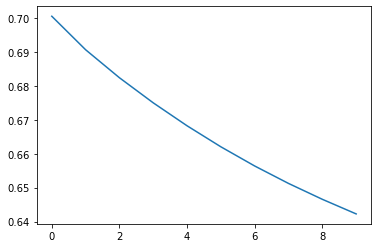

In [74]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=2))
model.add_module('a1', nn.Sigmoid())
optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy

loss_history_1 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_1.append(loss.item())

plt.plot(loss_history_1)
f1_1_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_1_train)
loss_train.append(loss_history_1[-1])

In [75]:
y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_1 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_1)
print(f1_1)
loss_test_1 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_1.detach().numpy())

0.5973278175313059


Два слоя

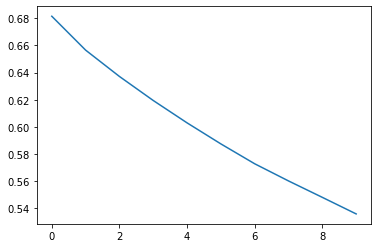

In [76]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=2))
model.add_module('a2', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history_2 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_2.append(loss.item())

plt.plot(loss_history_2)
f1_2_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_2_train)
loss_train.append(loss_history_2[-1])

In [77]:
y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_2 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_2)
print(f1_2)
loss_test_2 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_2.detach().numpy())

0.6852305514725896


3 слоя

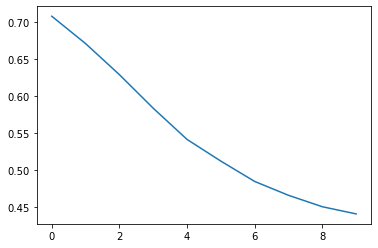

In [78]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history_3 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_3.append(loss.item())

plt.plot(loss_history_3)
f1_3_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_3_train)
loss_train.append(loss_history_3[-1])

In [79]:
y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_3 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_3)
print(f1_3)
loss_test_3 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_3.detach().numpy())

0.7418207200918692


4 слоя

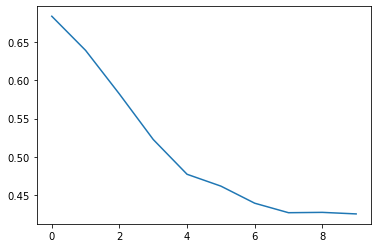

In [80]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=49))
model.add_module('a3', nn.Tanh())
model.add_module('l4', nn.Linear(in_features=49, out_features=2))
model.add_module('a4', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history_4 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_4.append(loss.item())

plt.plot(loss_history_4)
f1_4_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train.append(f1_4_train)
loss_train.append(loss_history_4[-1])

In [81]:
y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_4 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test.append(f1_4)
print(f1_4)
loss_test_4 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test.append(loss_test_4.detach().numpy())

0.7551718092566619


Отрисовка

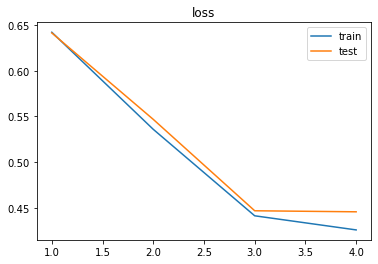

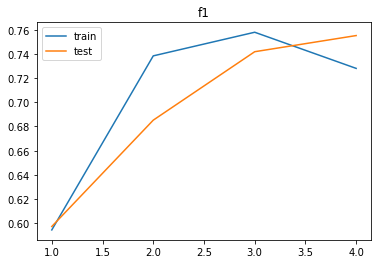

In [82]:
plt.plot([1, 2, 3 , 4], loss_train)
plt.plot([1, 2, 3 , 4], loss_test)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot([1, 2, 3 , 4], f1_train)
plt.plot([1, 2, 3 , 4], f1_test)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

# 2.4

0.4625228519195612
0.7631189083820664
0.5107318113932153
0.7194656488549619


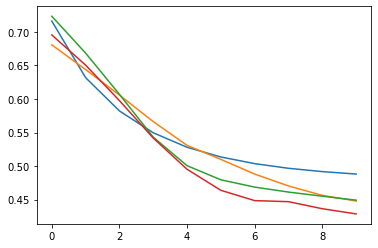

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
loss_train_24 = []
loss_test_24 = []
f1_train_24 = []
f1_test_24 = []
Sigmoid = nn.Sigmoid()
Tanh = nn.Tanh()
ReLU = nn.ReLU()
ELU = nn.ELU()

activ = [Sigmoid, Tanh, ReLU, ELU]
for act in activ:
    model = nn.Sequential()
    model.add_module('l1', nn.Linear(in_features=49, out_features=49))
    model.add_module('a1', act)
    model.add_module('l2', nn.Linear(in_features=49, out_features=49))
    model.add_module('a2', act)
    model.add_module('l3', nn.Linear(in_features=49, out_features=2))
    model.add_module('a3', nn.Sigmoid())
    optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
    loss_f = F.cross_entropy
    loss_history = []
    for epoch in range(10):
        optim.zero_grad()
        model.train()

        y_pred_train = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
        loss = loss_f(y_pred_train, torch.from_numpy(y_train.to_numpy()).reshape(-1))
        loss.backward()
    
        optim.step()

        loss_history.append(loss.item())

    plt.plot(loss_history)
    f1_train = f1_score(y_train, np.argmax(y_pred_train.detach().numpy(), axis=1), average='macro')
    f1_train_24.append(f1_train)
    loss_train_24.append(loss_history[-1])
    
    y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
    y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
    f1 = f1_score(y_test, y_pred_metrics, average='macro')
    f1_test_24.append(f1)
    print(f1)
    loss_test = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
    loss_test_24.append(loss_test.detach().numpy())

Отрисовка

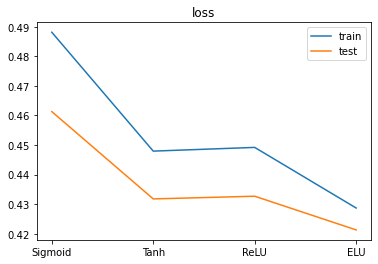

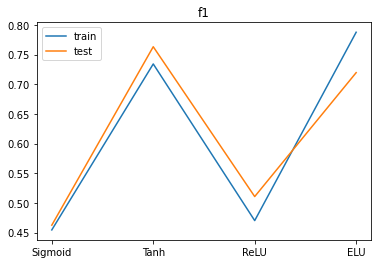

In [95]:
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], loss_train_24)
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], loss_test_24)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], f1_train_24)
plt.plot(['Sigmoid', 'Tanh', 'ReLU', 'ELU'], f1_test_24)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

# 2.5

tensor(0.6930, grad_fn=<NllLossBackward0>)
tensor(0.6877, grad_fn=<NllLossBackward0>)
tensor(0.6825, grad_fn=<NllLossBackward0>)
tensor(0.6774, grad_fn=<NllLossBackward0>)
tensor(0.6724, grad_fn=<NllLossBackward0>)
tensor(0.6675, grad_fn=<NllLossBackward0>)
tensor(0.6627, grad_fn=<NllLossBackward0>)
tensor(0.6579, grad_fn=<NllLossBackward0>)
tensor(0.6533, grad_fn=<NllLossBackward0>)
tensor(0.6488, grad_fn=<NllLossBackward0>)
0.48114872453072355
tensor(0.6443, grad_fn=<NllLossBackward0>)
tensor(0.6399, grad_fn=<NllLossBackward0>)
tensor(0.6316, grad_fn=<NllLossBackward0>)
tensor(0.6203, grad_fn=<NllLossBackward0>)
tensor(0.6064, grad_fn=<NllLossBackward0>)
tensor(0.5908, grad_fn=<NllLossBackward0>)
tensor(0.5743, grad_fn=<NllLossBackward0>)
tensor(0.5577, grad_fn=<NllLossBackward0>)
tensor(0.5415, grad_fn=<NllLossBackward0>)
tensor(0.5266, grad_fn=<NllLossBackward0>)
0.4585635359116022
tensor(0.5132, grad_fn=<NllLossBackward0>)
tensor(0.4788, grad_fn=<NllLossBackward0>)
tensor(0.4587, 

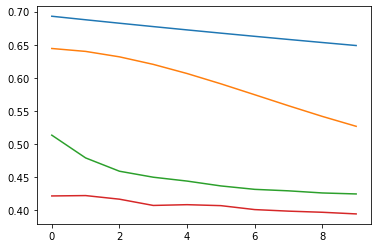

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
loss_train_25 = []
loss_test_25 = []
f1_train_25 = []
f1_test_25 = []
model = nn.Sequential()
model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())
SGD = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0)
SGD_with_momentum = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
RMSprop = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
Adam = torch.optim.Adam(model.parameters(), lr=0.01)
loss_f = F.cross_entropy
opt = [SGD, SGD_with_momentum, RMSprop, Adam]
for optim in opt:
    loss_history = []
    for epoch in range(10):
        optim.zero_grad()
        model.train()

        y_pred_train = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
        loss = loss_f(y_pred_train, torch.from_numpy(y_train.to_numpy()).reshape(-1))
        loss.backward()
    
        optim.step()

        loss_history.append(loss.item())

    plt.plot(loss_history)
    f1_train = f1_score(y_train, np.argmax(y_pred_train.detach().numpy(), axis=1), average='macro')
    f1_train_25.append(f1_train)
    loss_train_25.append(loss_history[-1])
    
    y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
    y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
    f1 = f1_score(y_test, y_pred_metrics, average='macro')
    f1_test_25.append(f1)
    print(f1)
    loss_test = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
    loss_test_25.append(loss_test.detach().numpy())

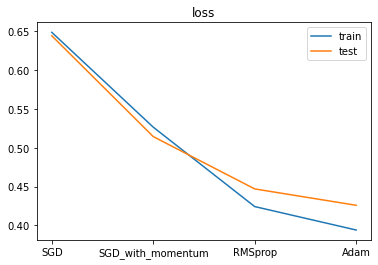

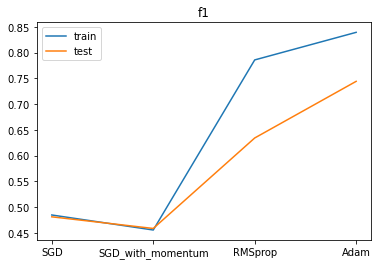

In [18]:
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], loss_train_25)
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], loss_test_25)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], f1_train_25)
plt.plot(['SGD', 'SGD_with_momentum', 'RMSprop', 'Adam'], f1_test_25)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

# 2.6

In [85]:
loss_train_26 = []
loss_test_26 = []
f1_train_26 = []
f1_test_26 = []

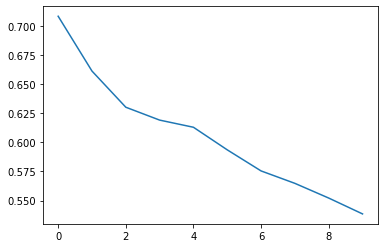

In [33]:

X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.BatchNorm1d(49))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.BatchNorm1d(49))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_1 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_1.append(loss.item())

plt.plot(loss_history_1)
f1_1_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_1_train)
loss_train_26.append(loss_history_1[-1])

In [34]:
y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_1 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_1)
print(f1_1)
loss_test_1 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_1.detach().numpy())

0.66181181092608


0.7685315519503757


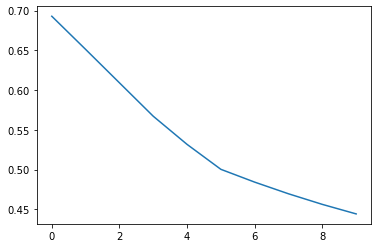

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.Dropout(0.2))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_2 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_2.append(loss.item())

plt.plot(loss_history_2)
f1_2_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_2_train)
loss_train_26.append(loss_history_2[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_2 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_2)
print(f1_2)
loss_test_2 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_2.detach().numpy())

0.7244979919678716


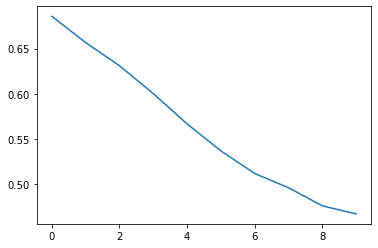

In [91]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.Dropout(0.5))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.Dropout(0.5))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_3 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_3.append(loss.item())

plt.plot(loss_history_3)
f1_3_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_3_train)
loss_train_26.append(loss_history_3[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_3 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_3)
print(f1_3)
loss_test_3 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_3.detach().numpy())

0.6951994590939824


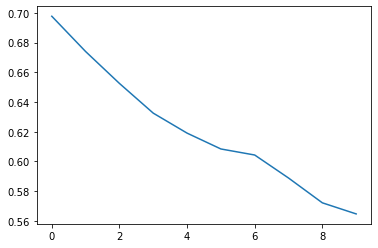

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.BatchNorm1d(49))
model.add_module('d1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.BatchNorm1d(49))
model.add_module('d2', nn.Dropout(0.2))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_4 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_4.append(loss.item())

plt.plot(loss_history_4)
f1_4_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_4_train)
loss_train_26.append(loss_history_4[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_4 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_4)
print(f1_4)
loss_test_4 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_4.detach().numpy())

0.6245210727969349


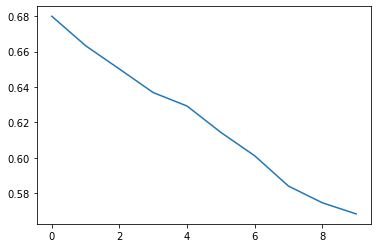

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('n1', nn.BatchNorm1d(49))
model.add_module('d1', nn.Dropout(0.5))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('n2', nn.BatchNorm1d(49))
model.add_module('d2', nn.Dropout(0.5))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.5, momentum=0)
loss_f = F.cross_entropy
loss_history_5 = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history_5.append(loss.item())

plt.plot(loss_history_5)
f1_5_train = f1_score(y_train, np.argmax(y_pred.detach().numpy(), axis=1), average='macro')
f1_train_26.append(f1_5_train)
loss_train_26.append(loss_history_5[-1])

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1_5 = f1_score(y_test, y_pred_metrics, average='macro')
f1_test_26.append(f1_5)
print(f1_5)
loss_test_5 = loss_f(y_pred, torch.from_numpy(y_test.to_numpy()).reshape(-1))
loss_test_26.append(loss_test_5.detach().numpy())

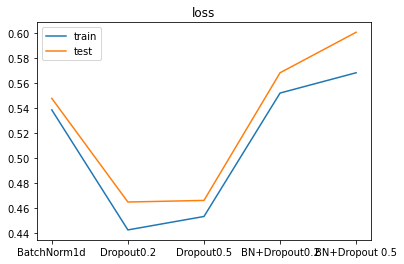

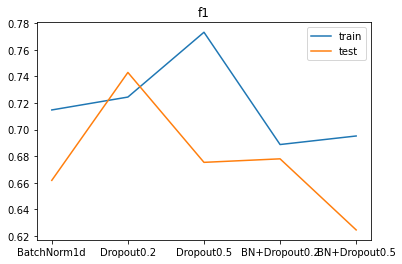

In [43]:
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout 0.5'], loss_train_26)
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout 0.5'], loss_test_26)
plt.title('loss')
plt.legend(['train', 'test'])
plt.show()
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout0.5'], f1_train_26)
plt.plot(['BatchNorm1d', 'Dropout0.2', 'Dropout0.5' , 'BN+Dropout0.2', 'BN+Dropout0.5'], f1_test_26)
plt.title('f1')
plt.legend(['train', 'test'])
plt.show()

# 2.7 лучшая модель 

0.7907983816862179


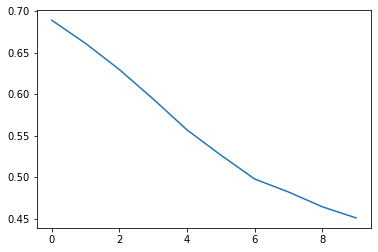

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
model = nn.Sequential()

model.add_module('l1', nn.Linear(in_features=49, out_features=49))
model.add_module('d1', nn.Dropout(0.2))
model.add_module('a1', nn.Tanh())
model.add_module('l2', nn.Linear(in_features=49, out_features=49))
model.add_module('d2', nn.Dropout(0.2))
model.add_module('a2', nn.Tanh())
model.add_module('l3', nn.Linear(in_features=49, out_features=2))
model.add_module('a3', nn.Sigmoid())

optim = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.2, momentum=0)
loss_f = F.cross_entropy
loss_history = []

for epoch in range(10):
    optim.zero_grad()
    model.train()

    y_pred = model.forward(torch.from_numpy(X_train.to_numpy()).float())
    
    loss = loss_f(y_pred, torch.from_numpy(y_train.to_numpy()).reshape(-1))
    loss.backward()
    
    optim.step()

    loss_history.append(loss.item())

plt.plot(loss_history)

y_pred = model.forward(torch.from_numpy(X_test.to_numpy()).float())
y_pred_metrics = np.argmax(y_pred.detach().numpy(), axis=1)
f1 = f1_score(y_test, y_pred_metrics, average='macro')
print(f1)